# IMPORT DATA TO PYTHON

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd

In [2]:
# Import data into python environment

comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv')

# Check data and preprocess data

In [3]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Basic info about data

comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
# Date should be of dtype datetime. Hence changing the same

comcast_data['Date'] = pd.to_datetime(comcast_data['Date'], format = '%d-%m-%y')

In [6]:
#Confirm the same

comcast_data.info() #Data type of Date column updated correctly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null datetime64[ns]
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 191.2+ KB


In [7]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
# Complaint at monthly level
# Should add another column to capture only month value.

comcast_data['Month'] = pd.DatetimeIndex(comcast_data['Date']).month

In [9]:
# Check dataset

comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [10]:
# Grouping data at Month level to find the complaints at monthly level

monthly_complaints_grp = comcast_data.groupby(['Month'])

In [11]:
# Checking count at monthly level

monthly_complaints = pd.DataFrame(monthly_complaints_grp['Ticket #'].count())
monthly_complaints

,Ticket #
Month,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


In [12]:
# To show in line chart get matplotlib lib

from matplotlib import pyplot as plt

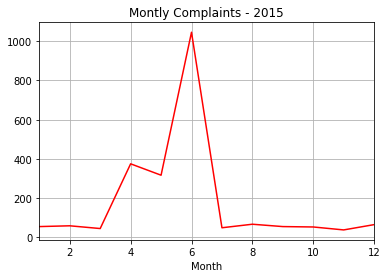

In [13]:
# Create line chart

monthly_complaints.plot(grid = True, legend = False, title = 'Montly Complaints - 2015', color = 'red')

In [14]:
# Daily level complaints

# Group at date level

daily_complaint_grp = comcast_data.groupby(['Date'])
daily_complaints = pd.DataFrame(daily_complaint_grp['Ticket #'].count())
daily_complaints

,Ticket #
Date,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
...,...
2015-11-05,12
2015-11-06,21
2015-12-04,15


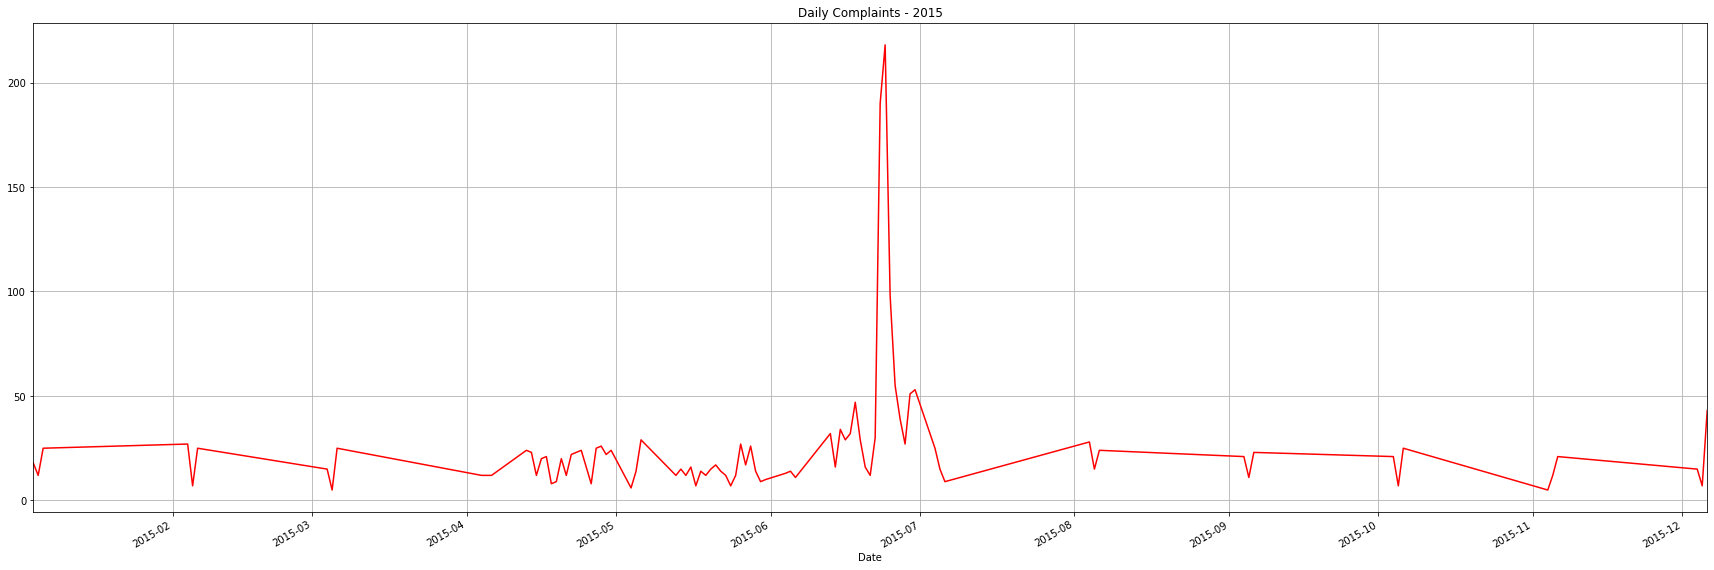

In [15]:
daily_complaints.plot(grid = True, legend = False, title = 'Daily Complaints - 2015', figsize = (30,10),color = 'red')

# Provide a table with the frequency of complaint types.
    #Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [16]:
#Frequency of Complaint types

# Creating aonther categorical variable to capture type of complaints

# 1. Creating a list from col. Customer Complaints as i will be using for loop to iterate through the col data

cc_list = comcast_data['Customer Complaint'].to_list()
cc_list[0:5]

['Comcast Cable Internet Speeds',
 'Payment disappear - service got disconnected',
 'Speed and Service',
 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
 'Comcast not working and no service to boot']

In [17]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [18]:
# 2. Apply for loop and get the categorical variable in the form of list

L1 = [] # creating an empty list to hold the values
for x in cc_list:
    if ('internet' in x.lower() or 'speed' in x.lower() or 'data' in x.lower() 
        or 'service' in x.lower() or 'bandwidth' in x.lower()):
        L1.append('Internet Issue')
    elif ('network' in x.lower() or 'comcast' in x.lower()):
        L1.append('Network Issue')
    else:
        L1.append('Others')
cust_complaint_type = L1

cust_complaint_type[0:5]

['Internet Issue',
 'Internet Issue',
 'Internet Issue',
 'Network Issue',
 'Internet Issue']

In [19]:
# Convert list to Dataframe so that we can concatenate it with the comcast data

df_cust_comp_type = pd.DataFrame(cust_complaint_type, columns=['Complaint Type'])
df_cust_comp_type.head()

,Complaint Type
0,Internet Issue
1,Internet Issue
2,Internet Issue
3,Network Issue
4,Internet Issue


In [20]:
# Concatenate the two Dataframes and check data

comcast_data = pd.concat([comcast_data, df_cust_comp_type], axis = 1)
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint Type
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet Issue
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Internet Issue
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet Issue
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Network Issue
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Internet Issue


In [21]:
comcast_data.shape

(2224, 13)

In [22]:
# Check frequency of complaint type

comp_type_grp = comcast_data.groupby(['Complaint Type'])
freq_comp_type = pd.DataFrame(comp_type_grp['Ticket #'].count())

#Combined above two rows in single line of code-
# pd.DataFrame(comcast_data.groupby(['Complaint Type'])['Ticket #'].count())

freq_comp_type # From below table - Complaints around internet are maximum with Comcast Telecom services.

,Ticket #
Complaint Type,
Internet Issue,1170
Network Issue,645
Others,409


From above table - Complaints around internet are maximum with Comcast Telecom services.

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [23]:
# Check current unique status in dataframe

comcast_data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [24]:
# 1. Again creating list of status column to iterate through column values

current_status_list = comcast_data['Status'].to_list()
current_status_list[0:5]

['Closed', 'Closed', 'Closed', 'Open', 'Solved']

In [25]:
# Using for loop to record the two status

L2 = []
for status in current_status_list:
    if (status == 'Open' or status == 'Pending'):
        L2.append('OPEN')
    else:
        L2.append('CLOSED')
new_status_list = L2 # Assignig new categorical values to new list

new_status_list[0:5] # Check new list data

['CLOSED', 'CLOSED', 'CLOSED', 'OPEN', 'CLOSED']

In [26]:
# Concatenate the list to comcast_data dataset by converting it to a dataframe

comcast_data = pd.concat([comcast_data, pd.DataFrame(new_status_list, columns = ['New Status'])], axis = 1)
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint Type,New Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet Issue,CLOSED
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Internet Issue,CLOSED
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet Issue,CLOSED
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Network Issue,OPEN
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Internet Issue,CLOSED


# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
        -Which state has the maximum complaints
        -Which state has the highest percentage of unresolved complaint

In [27]:
# State-wise status of complaints

# Need to group the count of tickets by state and new status 
#(i.e. which state has how many open tickets and how many are open and how may are closed)

state_wise_grp = comcast_data.groupby(['State','New Status'])
state_wise_comp_status = pd.DataFrame(state_wise_grp['Ticket #'].count())
state_wise_comp_status

Ticket #
State         New Status          
Alabama       CLOSED            17
              OPEN               9
Arizona       CLOSED            14
              OPEN               6
Arkansas      CLOSED             6
...                            ...
Virginia      OPEN              11
Washington    CLOSED            75
              OPEN              23
West Virginia CLOSED             8
              OPEN               3

[77 rows x 1 columns]

In [28]:
#Renaming column name

state_wise_comp_status = state_wise_comp_status.rename(columns={'Ticket #':'Count'})
state_wise_comp_status.head()

Count
State    New Status       
Alabama  CLOSED         17
         OPEN            9
Arizona  CLOSED         14
         OPEN            6
Arkansas CLOSED          6

In [29]:
# Converting NEW STATUS column to 2 new column with OPEN and CLOSED status

state_wise_comp_status.unstack()

Count      
New Status           CLOSED  OPEN
State                            
Alabama                17.0   9.0
Arizona                14.0   6.0
Arkansas                6.0   NaN
California            159.0  61.0
Colorado               58.0  22.0
Connecticut             9.0   3.0
Delaware                8.0   4.0
District Of Columbia   14.0   2.0
District of Columbia    1.0   NaN
Florida               201.0  39.0
Georgia               208.0  80.0
Illinois              135.0  29.0
Indiana                50.0   9.0
Iowa                    1.0   NaN
Kansas                  1.0   1.0
Kentucky                4.0   3.0
Louisiana              12.0   1.0
Maine                   3.0   2.0
Maryland               63.0  15.0
Massachusetts          50.0  11.0
Michigan               92.0  23.0
Minnesota              29.0   4.0
Mississippi            23.0  16.0
Missouri                3.0   1.0
Montana                 1.0   NaN
Nevada                  1.0   NaN
New Hampshire           8.0   4.0
New Jersey             56.0  19.0
New Mexico             11.0   4.0
New York                6.0   NaN
North Carolina          3.0   NaN
Ohio                    3.0   NaN
Oregon                 36.0  13.0
Pennsylvania          110.0  20.0
Rhode Island            1.0   NaN
South Carolina         15.0   3.0
Tennessee              96.0  47.0
Texas                  49.0  22.0
Utah                   16.0   6.0
Vermont                 2.0   1.0
Virginia               49.0  11.0
Washington             75.0  23.0
West Virginia           8.0   3.0

In [30]:
# Some slots contains NaN values, so to handle missing value with 0 using fillna() function

state_wise_comp_status.unstack().fillna(0)

comp_count = pd.DataFrame(state_wise_comp_status.unstack().fillna(0))
comp_count.head(15)

Count      
New Status           CLOSED  OPEN
State                            
Alabama                17.0   9.0
Arizona                14.0   6.0
Arkansas                6.0   0.0
California            159.0  61.0
Colorado               58.0  22.0
Connecticut             9.0   3.0
Delaware                8.0   4.0
District Of Columbia   14.0   2.0
District of Columbia    1.0   0.0
Florida               201.0  39.0
Georgia               208.0  80.0
Illinois              135.0  29.0
Indiana                50.0   9.0
Iowa                    1.0   0.0
Kansas                  1.0   1.0

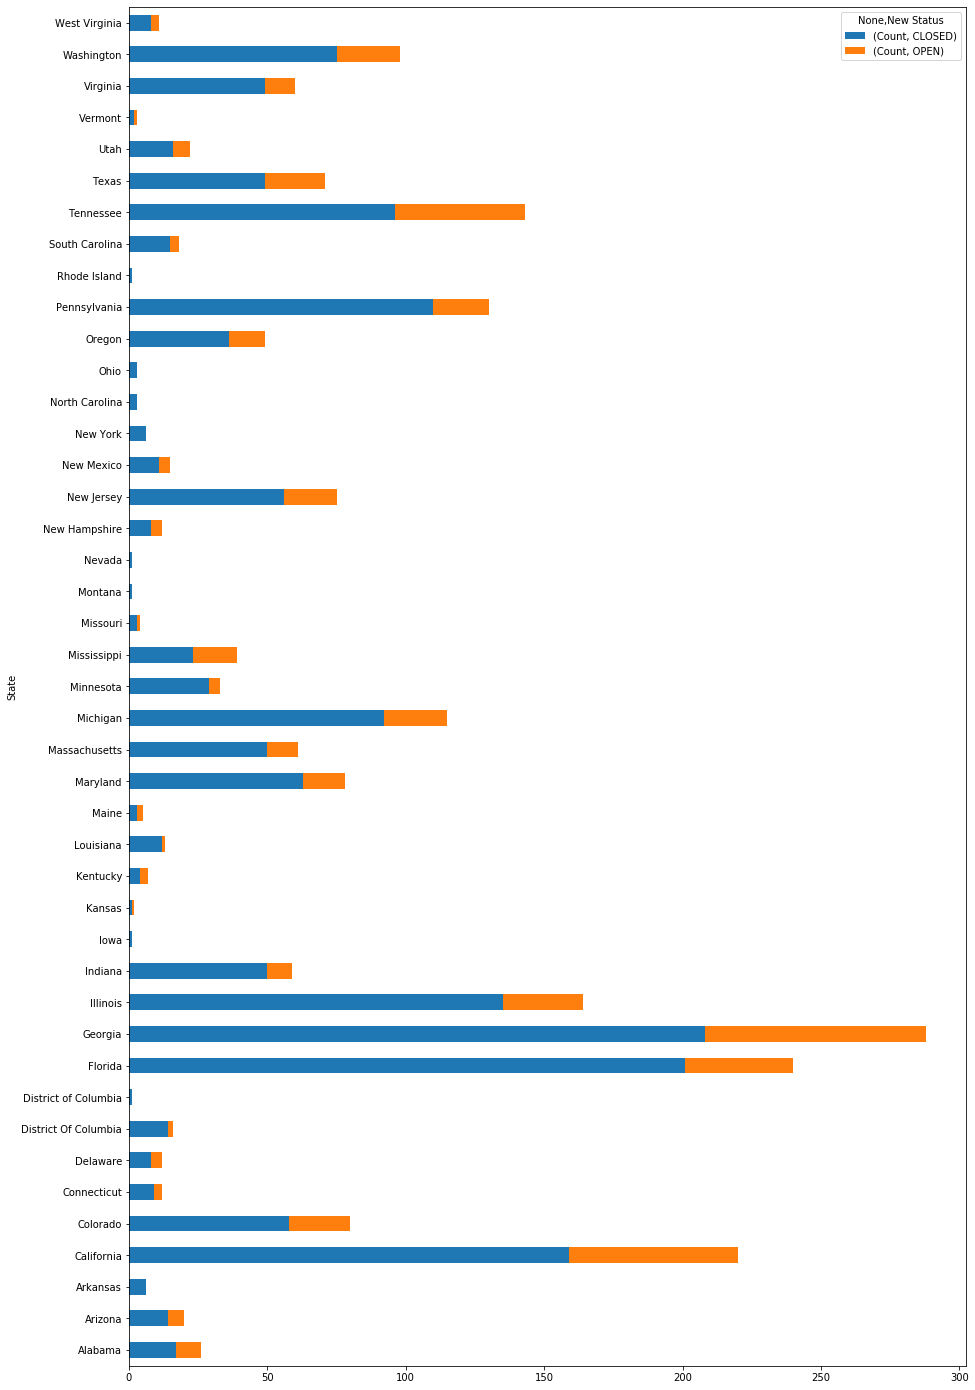

In [31]:
comp_count.plot(kind = 'barh', figsize = (15,25),stacked = True)

In [33]:
# Arranging in descending order
print(comp_count.columns)
comp_count = comp_count.sort_values([('Count', 'CLOSED'),('Count', 'OPEN')]  ,ascending = False)
comp_count.head()
# From stacked bar chart and comp_count dataframe, Georgia is the state with maximum complaints and unresolved complaints as well

MultiIndex([('Count', 'CLOSED'),
            ('Count',   'OPEN')],
           names=[None, 'New Status'])


Count      
New Status   CLOSED  OPEN
State                    
Georgia       208.0  80.0
Florida       201.0  39.0
California    159.0  61.0
Illinois      135.0  29.0
Pennsylvania  110.0  20.0

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls?

In [34]:
# Grouping by Received Via column to get how many complaints are received through customer care call and through internet

comp_through_grp = comcast_data.groupby(['Received Via'])
cust_comp_through = pd.DataFrame(comp_through_grp['Ticket #'].count())
cust_comp_through

,Ticket #
Received Via,
Customer Care Call,1119
Internet,1105


In [35]:
# Tickets received via internet.

via_internet = comp_through_grp.get_group('Internet')
via_internet.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint Type,New Status
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Internet Issue,CLOSED
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet Issue,CLOSED
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Network Issue,OPEN
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Internet Issue,CLOSED
5,338519,ISP Charging for arbitrary data limits with ov...,2015-12-06,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,Internet Issue,CLOSED


In [36]:
# Getting the count of CLOSED and OPEN ticket which are received via internet.

cnt = via_internet.groupby('New Status')['Ticket #'].count()
cnt

New Status
CLOSED    843
OPEN      262
Name: Ticket #, dtype: int64

In [37]:
# %age of tickets resolved which are received via internet.

percentage_int = cnt['CLOSED']/(cnt['CLOSED'] + cnt['OPEN'])*100
percentage_int

76.289592760181

In [38]:
# Tickets received via customer care call.

via_customer_call = comp_through_grp.get_group('Customer Care Call')
via_customer_call.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint Type,New Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet Issue,CLOSED
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Internet Issue,OPEN
8,318072,Comcast extended outages,2015-01-06,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,Network Issue,CLOSED
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Network Issue,OPEN
11,276409,YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE,2015-06-05,05-Jun-15,3:09:49 PM,Customer Care Call,Albuquerque,New Mexico,87109,Closed,No,6,Others,CLOSED


In [39]:
# Getting the count of CLOSED and OPEN ticket which are received via customer care call.

cnt2 = via_customer_call.groupby('New Status')['Ticket #'].count()
cnt2

New Status
CLOSED    864
OPEN      255
Name: Ticket #, dtype: int64

In [41]:
# %age of tickets resolved which are received via internet.

percentage_CCC = cnt2['CLOSED']/(cnt2['CLOSED'] + cnt2['OPEN'])*100
percentage_CCC

77.21179624664879